Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Loaded 408 valid records from Simile corpus.
✅ Loaded 994 valid records from Metaphor corpus.

📊 RESULTS: GRAMMATICAL STRUCTURE DISTRIBUTION (N=1402)

Structure Type                      | Count | Percentage
-------------------------------------------------------
Verbal Structure (Dynamic)          | 627   | 44.7%
Nominal Structure (Static)          | 294   | 21.0%
Adverbial Structure (Manner)        | 211   | 15.0%
Adjectival Structure (Descriptive)  | 149   | 10.6%
Discourse Structure (Contextual)    | 121   | 8.6%

📝 [Generated Narrative for Section 4.1]:
------------------------------------------------------------
The distributional analysis of grammatical structures highlights a functional dichotomy between static and dynamic representations. The corpus exhibits a predilection for **Verbal Structures** (44.7%), surpassing Nomin

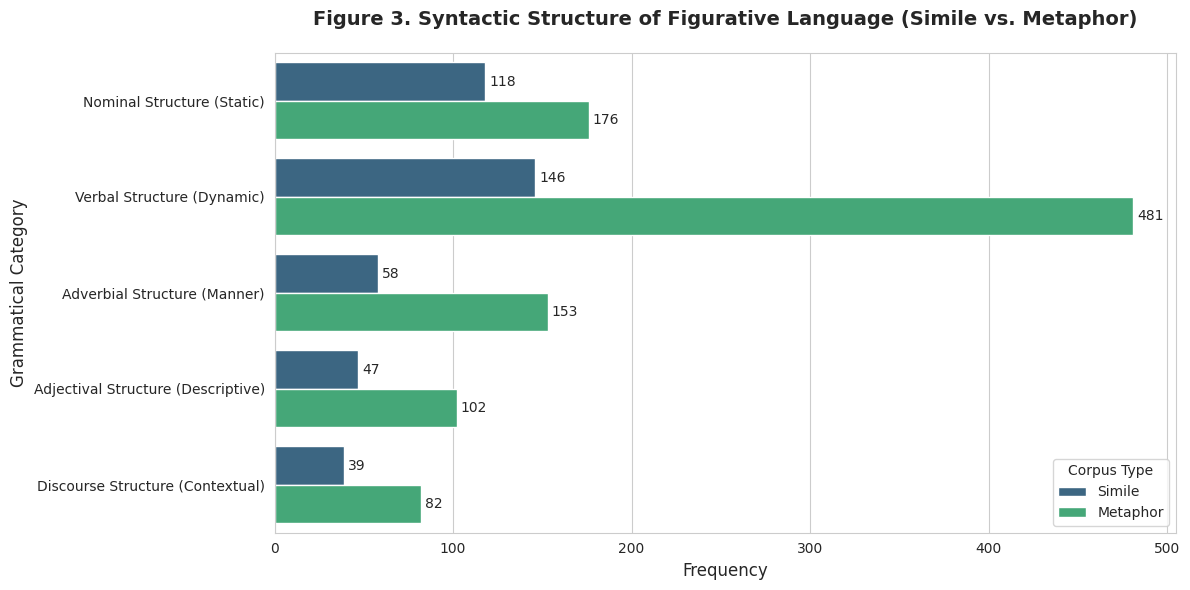

In [ ]:
# @title 5. تحليل توزيع البنية النحوية (Standardized Data)
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# ---------------------------------------------------------
# 1. MOUNT DRIVE
# ---------------------------------------------------------
print("Mounting Google Drive...")
drive.mount('/content/drive')

# يرجى التأكد من المسارات (مسافة أو بدون مسافة في اسم المجلد)
path_similes = '/content/drive/MyDrive/Pragmatic/corpus/similes_data.json'
path_metaphors = '/content/drive/MyDrive/Pragmatic/corpus/metaphors_data.json'

# ---------------------------------------------------------
# 2. STRICT TAXONOMY MAPPING
# ---------------------------------------------------------
# ربط القيم الخمس المعيارية بالعناوين التوضيحية للرسم البياني
structure_map = {
    'nominal_structure': 'Nominal Structure (Static)',
    'verbal_structure': 'Verbal Structure (Dynamic)',
    'adverbial_structure': 'Adverbial Structure (Manner)',
    'adjectival_structure': 'Adjectival Structure (Descriptive)',
    'discourse_structure': 'Discourse Structure (Contextual)'
}

# ---------------------------------------------------------
# 3. LOADING FUNCTION
# ---------------------------------------------------------
def load_and_extract(file_path, corpus_type):
    data_rows = []
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            records = json.load(f)

        for record in records:
            # الوصول لقائمة الصور
            items = record.get('rhetorical_analysis', {}).get('similes', [])

            for item in items:
                # قراءة الحقل المعياري مباشرة
                gram_struct = item.get('syntactic_structure', {}).get('grammatical_structure')

                # التحقق مما إذا كانت القيمة موجودة وصحيحة ضمن التصنيف
                if gram_struct and gram_struct in structure_map:
                    data_rows.append({
                        'corpus_type': corpus_type,
                        'category': structure_map[gram_struct],
                        'raw_val': gram_struct # للاحتياط
                    })

        print(f"✅ Loaded {len(data_rows)} valid records from {corpus_type} corpus.")
        return data_rows

    except FileNotFoundError:
        print(f"⚠️ File not found: {file_path}")
        return []

# تحميل البيانات
rows_similes = load_and_extract(path_similes, 'Simile')
rows_metaphors = load_and_extract(path_metaphors, 'Metaphor')

# دمج البيانات
all_data = rows_similes + rows_metaphors
df = pd.DataFrame(all_data)

# ---------------------------------------------------------
# 4. ANALYSIS & REPORT
# ---------------------------------------------------------
if not df.empty:
    print("\n" + "="*60)
    print(f"📊 RESULTS: GRAMMATICAL STRUCTURE DISTRIBUTION (N={len(df)})")
    print("="*60)

    # حساب التكرارات
    counts = df['category'].value_counts()
    percentages = df['category'].value_counts(normalize=True) * 100

    print(f"\n{'Structure Type':<35} | {'Count':<5} | {'Percentage'}")
    print("-" * 55)
    for cat, count in counts.items():
        print(f"{cat:<35} | {count:<5} | {percentages[cat]:.1f}%")

    # --- التعليق الأكاديمي ---
    nominal_pct = percentages.get('Nominal Structure (Static)', 0)
    verbal_pct = percentages.get('Verbal Structure (Dynamic)', 0)

    print("\n📝 [Generated Narrative for Section 4.1]:")
    print("-" * 60)

    narrative = "The distributional analysis of grammatical structures highlights a functional dichotomy between static and dynamic representations. "

    if nominal_pct > verbal_pct:
        diff = nominal_pct - verbal_pct
        narrative += (
            f"The corpus exhibits a predilection for **Nominal Structures** ({nominal_pct:.1f}%), surpassing Verbal forms by {diff:.1f}%. "
            "This suggests that the primary pragmatic function of figurative language in the corpus is to establish **Static Truths**. "
            "Nominal sentences (Jimla Ismiyya) serve to frame the imagery as enduring attributes, fixed realities, or timeless definitions."
        )
    else:
        diff = verbal_pct - nominal_pct
        narrative += (
            f"The corpus exhibits a predilection for **Verbal Structures** ({verbal_pct:.1f}%), surpassing Nominal forms by {diff:.1f}%. "
            "This suggests that the primary pragmatic function is the construction of **Dynamic Narratives**. "
            "The imagery is predominantly embedded in event-based clauses, emphasizing the unfolding of actions, consequences, and temporal processes."
        )

    print(narrative)

    # ---------------------------------------------------------
    # 5. VISUALIZATION
    # ---------------------------------------------------------
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")

    # ترتيب ثابت للمحور لسهولة المقارنة
    order = list(structure_map.values())
    # تصفية الترتيب ليشمل فقط ما هو موجود في البيانات لتجنب مساحات فارغة
    order = [o for o in order if o in df['category'].unique()]

    # رسم مقارن
    ax = sns.countplot(data=df, y='category', hue='corpus_type', order=order, palette='viridis')

    plt.title('Figure 3. Syntactic Structure of Figurative Language (Simile vs. Metaphor)', fontsize=14, weight='bold', pad=20)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Grammatical Category', fontsize=12)
    plt.legend(title='Corpus Type', loc='lower right')

    # إضافة الأرقام على الأعمدة (اختياري للتحسين)
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', padding=3, fontsize=10)

    plt.tight_layout()
    plt.show()

else:
    print("⚠️ No valid data found. Please check that 'grammatical_structure' field exists and matches the standard keys.")